# Barres Comprimées 
## Ned max

ce code permet de trouvé le Ned max de chaque type de bois selon les dimensions, le type de choc, Lk et la classe d'humidité 

In [20]:
import math
import pandas as pd

# Paramètres des bois (f_c,0,d en N/mm² et E_0,05 en N/mm²)
parametres_bois = {
    "C16": {"f_c0d": 10.0, "E_005": 5400, "type": "massif"},
    "C24": {"f_c0d": 12.4, "E_005": 7400, "type": "massif"},
    "C30": {"f_c0d": 14.1, "E_005": 8200, "type": "massif"},
    "D30": {"f_c0d": 14.1, "E_005": 8200, "type": "massif"},
    "GL20h": {"f_c0d": 13.3, "E_005": 8000, "type": "lamelle"},
    "GL24h": {"f_c0d": 14.0, "E_005": 10000, "type": "lamelle"},
    "GL28h": {"f_c0d": 16.0, "E_005": 11500, "type": "lamelle"},
    "GL32h": {"f_c0d": 21.3, "E_005": 14200, "type": "lamelle"}
}

# Fonction pour calculer N_ed max pour chaque type de bois
def calculer_Ned_max_pour_tous_les_bois(dimensions, type_charge, classe_humidite, Lk):
    b, h = dimensions  # Dimensions de la section
    A = b * h  # Aire de la section en mm²

    # Facteurs ηt et ηw
    eta_t = 1.0 if type_charge == "période infinie" else 1.4
    eta_w = {1: 1.0, 2: 0.8, 3: 0.6}[classe_humidite]
    
    # Liste pour stocker les résultats
    resultats = []

    # Parcourir chaque type de bois
    for type_bois, propriete in parametres_bois.items():
        f_c0d = propriete["f_c0d"]
        bois_type = propriete["type"]
        
        # Formule simplifiée pour λ_rel
        if bois_type == "massif":
            lambda_rel = Lk / 57
        elif bois_type == "lamelle":
            lambda_rel = Lk / 60
        
        # Coefficient de flambage kc (norme simplifiée)
        k = 0.5 * (1 + 0.1 * (lambda_rel - 0.3) + lambda_rel**2)
        kc = 1 / (k + math.sqrt(k**2 - lambda_rel**2))
        
        # Résistance modifiée
        f_c0d_mod = f_c0d * eta_t * eta_w
        
        # Effort maximal admissible
        Ned_max = kc * f_c0d_mod * A
        
        # Ajouter les résultats dans la liste
        resultats.append({
            "Type de Bois": type_bois,
            "f_c,0,d (N/mm²)": f_c0d,
            "λ_rel": round(lambda_rel, 2),
            "k_c": round(kc, 3),
            "Résistance Modifiée (N/mm²)": round(f_c0d_mod, 2),
            "N_ed,max (N)": round(Ned_max, 2)
        })
    
    # Créer un DataFrame Pandas pour un affichage propre
    df_resultats = pd.DataFrame(resultats)
    return df_resultats

# Entrée des paramètres utilisateur
dimensions = (100, 300)  # b (largeur) et h (hauteur) en mm
type_charge = "choc"  # 'choc' ou 'période infinie'
classe_humidite = 2  # Classe d'humidité (1, 2 ou 3)
Lk = 3000  # Longueur de flambage en mm

# Exécution
df_resultats = calculer_Ned_max_pour_tous_les_bois(dimensions, type_charge, classe_humidite, Lk)

# Affichage des résultats
print("\n### Résultats du Calcul ###")
print(f"Dimensions : b = {dimensions[0]} mm, h = {dimensions[1]} mm, L_k = {Lk} mm")
print(f"Type de charge : {type_charge}, Classe d'humidité : {classe_humidite}\n")
display(df_resultats)



### Résultats du Calcul ###
Dimensions : b = 100 mm, h = 300 mm, L_k = 3000 mm
Type de charge : choc, Classe d'humidité : 2



,Type de Bois,"f_c,0,d (N/mm²)",λ_rel,k_c,Résistance Modifiée (N/mm²),"N_ed,max (N)"
0,C16,10.0,52.63,0.0,11.20,121.07
1,C24,12.4,52.63,0.0,13.89,150.12
2,C30,14.1,52.63,0.0,15.79,170.70
3,D30,14.1,52.63,0.0,15.79,170.70
4,GL20h,13.3,50.00,0.0,14.90,178.40
5,GL24h,14.0,50.00,0.0,15.68,187.79
6,GL28h,16.0,50.00,0.0,17.92,214.61
7,GL32h,21.3,50.00,0.0,23.86,285.70


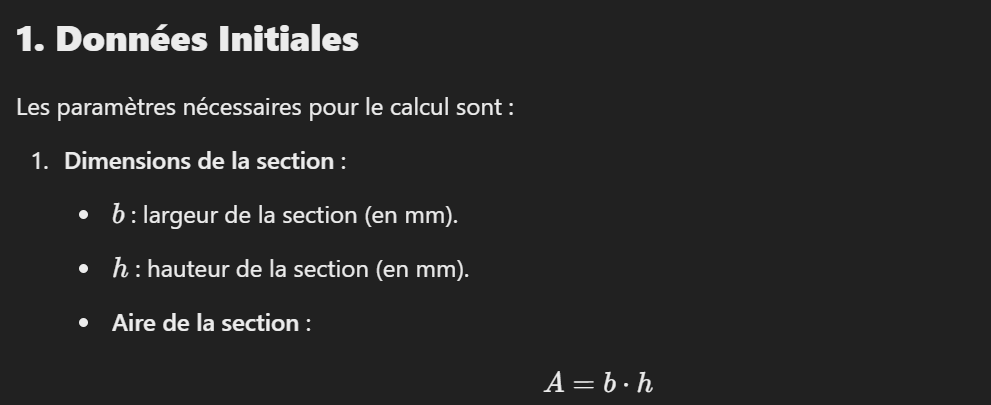
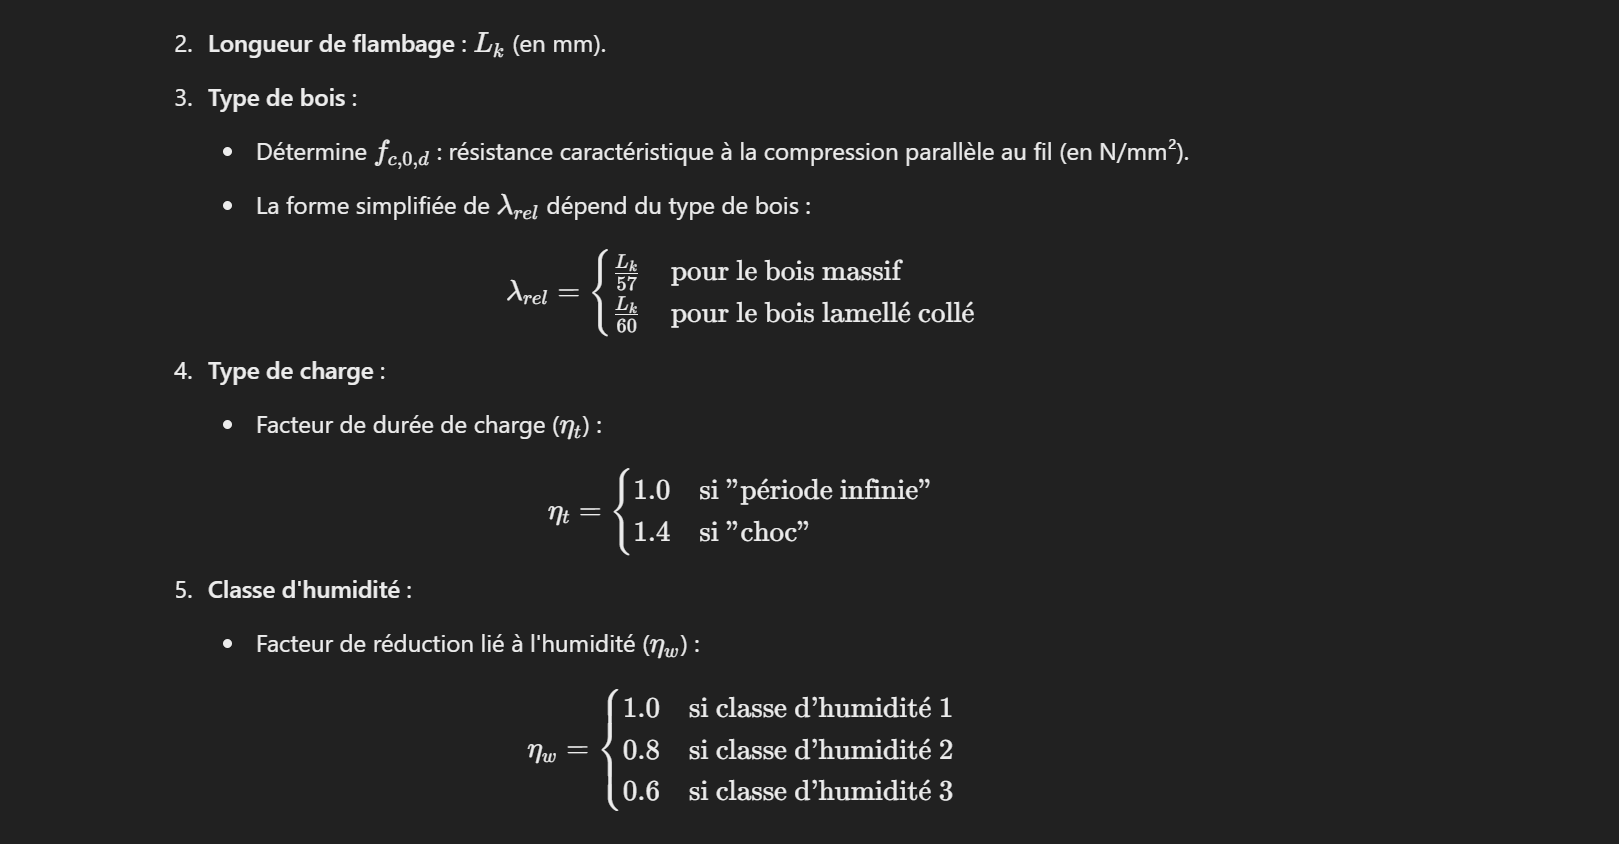
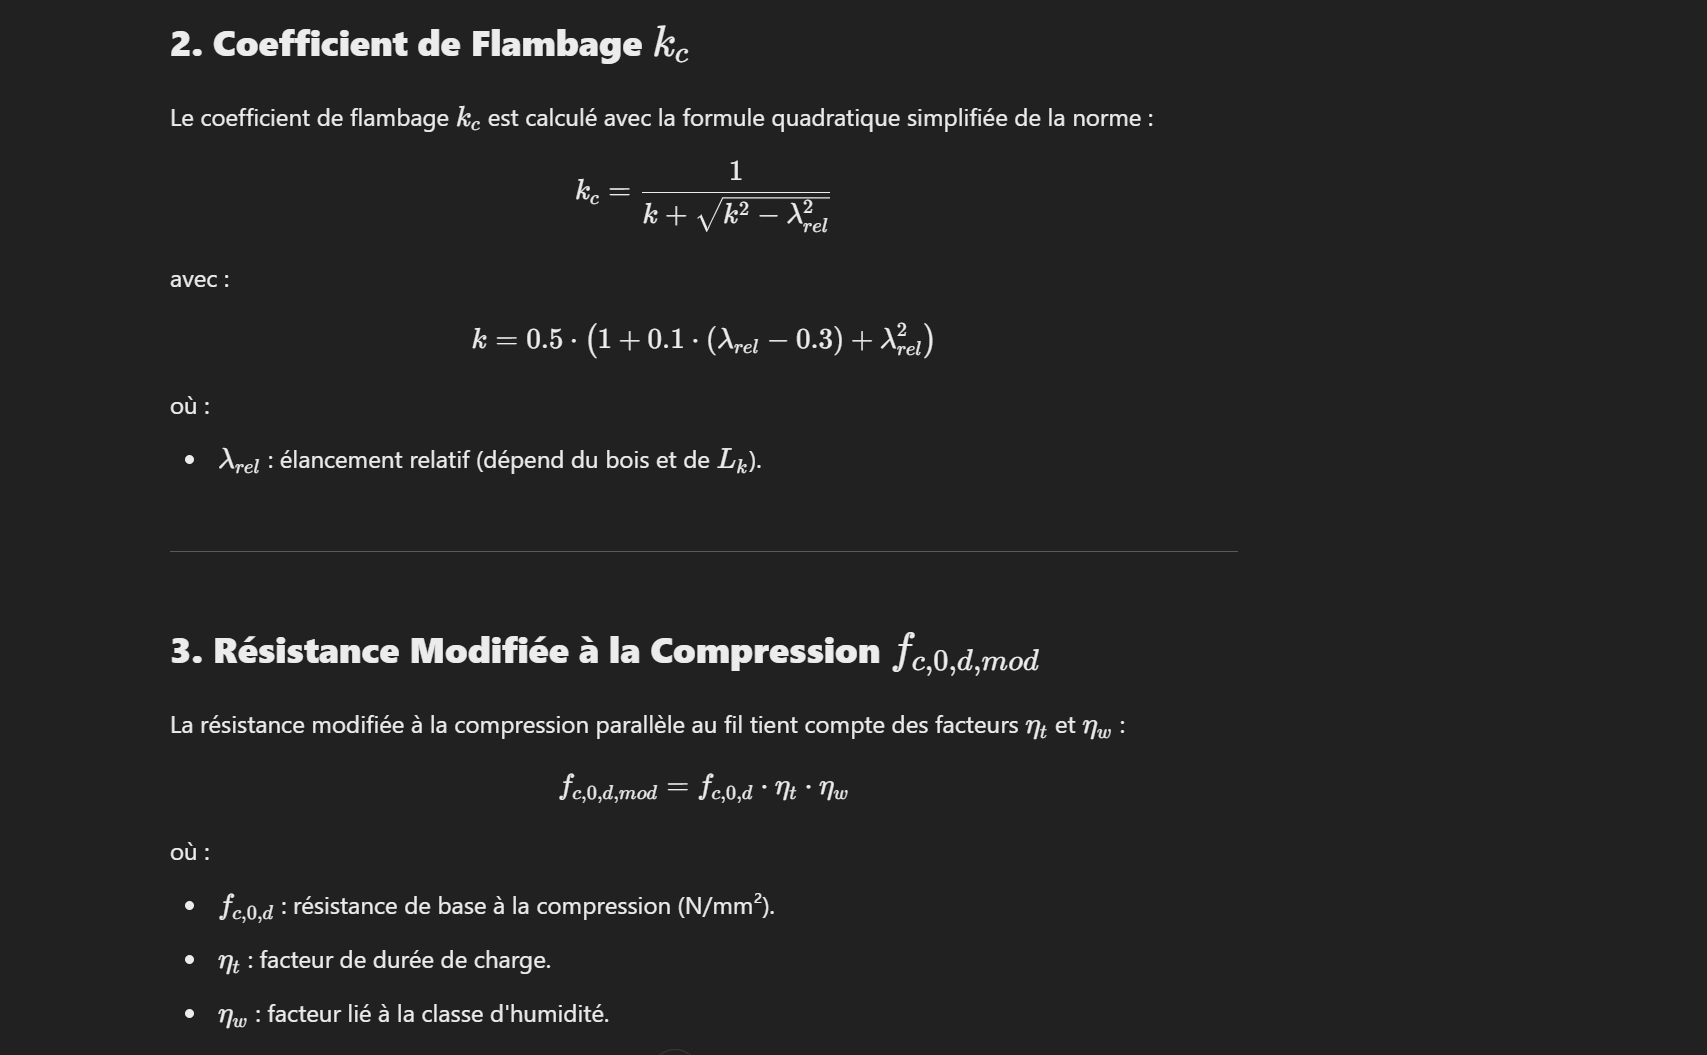
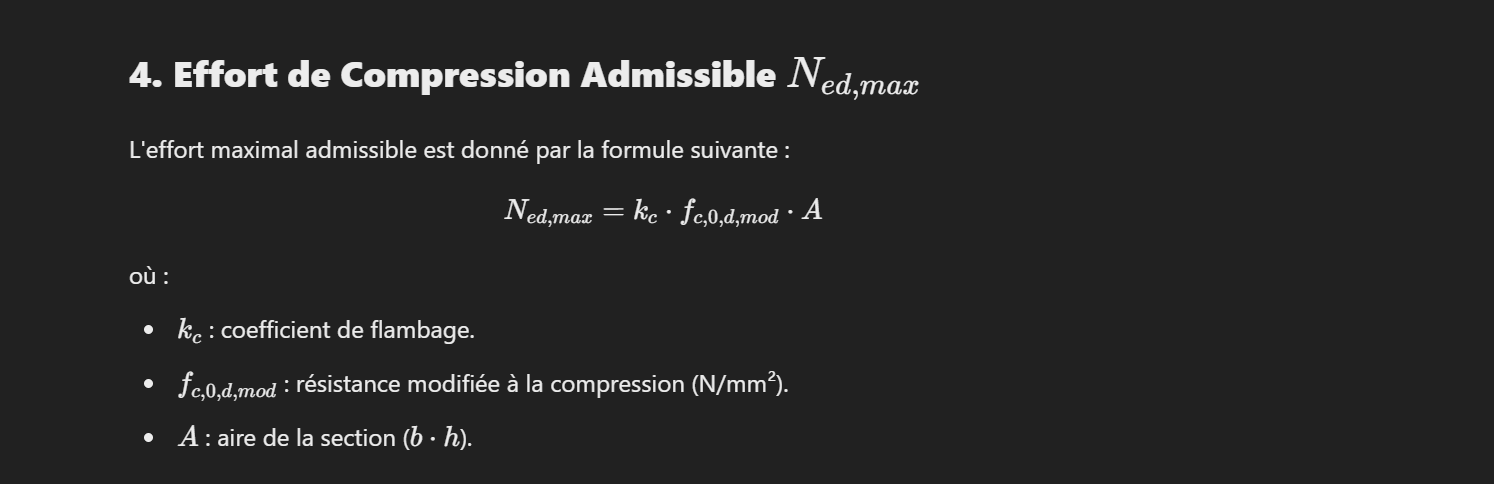


# Section minimum 


Base de donné des sections standard selon Lignum

In [21]:
import pandas as pd

# Création des dimensions pour Bois Massif
dimensions_massif = [
    (60, [100, 120, 140, 160, 180, 200]),
    (80, [100, 120, 140, 160, 180, 200, 220, 240]),
    (100, [100, 120, 140, 160, 180, 200, 220, 240, 260, 280]),
    (120, [120, 140, 160, 180, 200, 220, 240, 260, 280]),
    (140, [140, 160, 180, 200, 220, 240, 260, 280]),
    (160, [160, 180, 200, 220, 240, 260, 280, 300]),
    (180, [180, 200, 220, 240, 260, 280, 300]),
    (200, [200, 220, 240, 260, 280, 300]),
    (220, [220, 240, 260, 280, 300]),
    (240, [240, 260, 280, 300])
]

# Création des dimensions pour Bois Lamellé-Collé (BLC)
dimensions_blc = [
    (100, [120, 160, 200, 240, 280, 320, 360, 400, 440]),
    (120, [120, 160, 200, 240, 280, 320, 360, 400, 440, 480]),
    (140, [160, 200, 240, 280, 320, 360, 400, 440, 480, 520, 560, 600]),
    (160, [160, 200, 240, 280, 320, 360, 400, 440, 480, 520, 560, 600, 640, 680, 720, 760, 800, 840, 880, 920, 960, 1000]),
    (180, [200, 240, 280, 320, 360, 400, 440, 480, 520, 560, 600, 640, 680, 720, 760, 800, 840, 880, 920, 960, 1000]),
    (200, [200, 240, 280, 320, 360, 400, 440, 480, 520, 560, 600, 640, 680, 720, 760, 800, 840, 880, 920, 960, 1000])
]

# Fonction pour créer un DataFrame 
def creer_dataframe(dimensions, type_bois):
    data = {"Type de Bois": [], "b (mm)": [], "h (mm)": []}
    for b, h_values in dimensions:
        for h in h_values:
            data["Type de Bois"].append(type_bois)
            data["b (mm)"].append(b)
            data["h (mm)"].append(h)
    return pd.DataFrame(data)

# Création des DataFrames pour chaque type de bois
df_bois_massif = creer_dataframe(dimensions_massif, "Bois Massif")
df_bois_blc = creer_dataframe(dimensions_blc, "BLC")

# Fusion des deux DataFrames
df_bois_combined = pd.concat([df_bois_massif, df_bois_blc], ignore_index=True)

# Affichage du résultat final
print("Base de données des dimensions des bois (Bois Massif et BLC):")
print(df_bois_combined)

# Exporter les données dans un fichier CSV
df_bois_combined.to_csv("dimensions_bois.csv", index=False)
print("\nFichier 'dimensions_bois.csv' créé avec succès!")


Base de données des dimensions des bois (Bois Massif et BLC):
    Type de Bois  b (mm)  h (mm)
0    Bois Massif      60     100
1    Bois Massif      60     120
2    Bois Massif      60     140
3    Bois Massif      60     160
4    Bois Massif      60     180
..           ...     ...     ...
161          BLC     200     840
162          BLC     200     880
163          BLC     200     920
164          BLC     200     960
165          BLC     200    1000

[166 rows x 3 columns]

Fichier 'dimensions_bois.csv' créé avec succès!


# Hauteur minimum 
Calcule de la section minimum avec b défini 


In [22]:
import pandas as pd
import math

# Création des dimensions pour Bois Massif
dimensions_massif = [
    (60, [100, 120, 140, 160, 180, 200]),
    (80, [100, 120, 140, 160, 180, 200, 220, 240]),
    (100, [100, 120, 140, 160, 180, 200, 220, 240, 260, 280]),
    (120, [120, 140, 160, 180, 200, 220, 240, 260, 280]),
    (140, [140, 160, 180, 200, 220, 240, 260, 280]),
    (160, [160, 180, 200, 220, 240, 260, 280, 300]),
    (180, [180, 200, 220, 240, 260, 280, 300]),
    (200, [200, 220, 240, 260, 280, 300]),
    (220, [220, 240, 260, 280, 300]),
    (240, [240, 260, 280, 300])
]

# Création des dimensions pour Bois Lamellé-Collé (BLC)
dimensions_blc = [
    (100, [120, 160, 200, 240, 280, 320, 360, 400, 440]),
    (120, [120, 160, 200, 240, 280, 320, 360, 400, 440, 480]),
    (140, [160, 200, 240, 280, 320, 360, 400, 440, 480, 520, 560, 600]),
    (160, [160, 200, 240, 280, 320, 360, 400, 440, 480, 520, 560, 600, 640, 680, 720, 760, 800, 840, 880, 920, 960, 1000]),
    (180, [200, 240, 280, 320, 360, 400, 440, 480, 520, 560, 600, 640, 680, 720, 760, 800, 840, 880, 920, 960, 1000]),
    (200, [200, 240, 280, 320, 360, 400, 440, 480, 520, 560, 600, 640, 680, 720, 760, 800, 840, 880, 920, 960, 1000])
]

# Paramètres des bois
parametres_bois = {
    "C16": {"f_c0d": 10.0, "lambda_factor": 57, "beta_c": 0.2},
    "C24": {"f_c0d": 12.4, "lambda_factor": 57, "beta_c": 0.2},
    "C30": {"f_c0d": 14.1, "lambda_factor": 57, "beta_c": 0.2},
    "D30": {"f_c0d": 14.1, "lambda_factor": 57, "beta_c": 0.2},
    "GL20h": {"f_c0d": 13.3, "lambda_factor": 60, "beta_c": 0.1},
    "GL24h": {"f_c0d": 14.0, "lambda_factor": 60, "beta_c": 0.1},
    "GL28h": {"f_c0d": 16.0, "lambda_factor": 60, "beta_c": 0.1},
    "GL32h": {"f_c0d": 21.3, "lambda_factor": 60, "beta_c": 0.1}
}

# Création des DataFrames pour les dimensions
def creer_dataframe(dimensions, type_bois):
    data = {"Type de Bois": [], "b (mm)": [], "h (mm)": []}
    for b, h_values in dimensions:
        for h in h_values:
            data["Type de Bois"].append(type_bois)
            data["b (mm)"].append(b)
            data["h (mm)"].append(h)
    return pd.DataFrame(data)

df_bois_massif = creer_dataframe(dimensions_massif, "Bois Massif")
df_bois_blc = creer_dataframe(dimensions_blc, "BLC")
df_bois_combined = pd.concat([df_bois_massif, df_bois_blc], ignore_index=True)

# Fonction pour calculer kc
def calculer_kc(lambda_rel, beta_c):
    k = 0.5 * (1 + beta_c * (lambda_rel - 0.3) + lambda_rel**2)
    kc = 1 / (k + math.sqrt(k**2 - lambda_rel**2))
    return kc

# Fonction principale pour trouver la hauteur minimale
def trouver_hauteur_minimale(Ned, Lk, type_charge, type_bois, classe_humidite, b):
    eta_t = 1.0 if type_charge == "période infinie" else 1.4
    eta_w = {1: 1.0, 2: 0.8, 3: 0.6}[classe_humidite]
    f_c0d_mod = parametres_bois[type_bois]["f_c0d"] * eta_t * eta_w
    lambda_factor = parametres_bois[type_bois]["lambda_factor"]
    beta_c = parametres_bois[type_bois]["beta_c"]
    
    df_filtre = df_bois_combined[(df_bois_combined["b (mm)"] == b)]
    for _, row in df_filtre.iterrows():
        h = row["h (mm)"]
        A = b * h
        lambda_rel = (Lk / 1000) / lambda_factor  # Lk en mètres
        kc = calculer_kc(lambda_rel, beta_c)
        Ned_max = kc * f_c0d_mod * A
        if Ned <= Ned_max:
            return h
    return "Aucune hauteur trouvée pour ces paramètres."

# Exemple d'utilisation
if __name__ == "__main__":
    Ned = 275000  # Effort normal en N
    Lk = 3700  # Longueur de flambage en mm
    b = 200  # Largeur en mm
    type_bois = "GL24h"  # Type de bois
    type_charge = "période infinie"  # Type de charge
    classe_humidite = 1  # Classe d'humidité

    hauteur_min = trouver_hauteur_minimale(Ned, Lk, type_charge, type_bois, classe_humidite, b)
    print(f"Hauteur minimale trouvée pour {type_bois}, b = {b} mm : {hauteur_min} mm")


Hauteur minimale trouvée pour GL24h, b = 200 mm : 200 mm


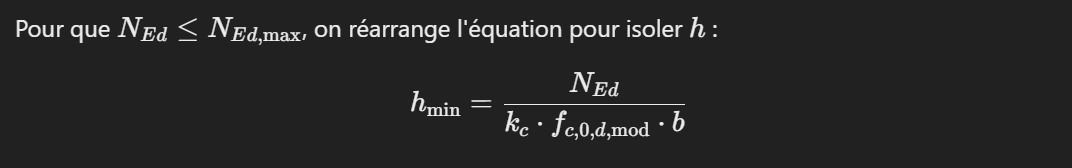

# Liste des section minimum 
ce code permet d'avoir toute les section minimum selon lk, le type de bois, la classe d'humidité et la charge Ned 

In [23]:
import pandas as pd
import math

# Création des dimensions pour Bois Massif
dimensions_massif = [
    (60, [100, 120, 140, 160, 180, 200]),
    (80, [100, 120, 140, 160, 180, 200, 220, 240]),
    (100, [100, 120, 140, 160, 180, 200, 220, 240, 260, 280]),
    (120, [120, 140, 160, 180, 200, 220, 240, 260, 280]),
    (140, [140, 160, 180, 200, 220, 240, 260, 280]),
    (160, [160, 180, 200, 220, 240, 260, 280, 300]),
    (180, [180, 200, 220, 240, 260, 280, 300]),
    (200, [200, 220, 240, 260, 280, 300]),
    (220, [220, 240, 260, 280, 300]),
    (240, [240, 260, 280, 300])
]

# Création des dimensions pour Bois Lamellé-Collé (BLC)
dimensions_blc = [
    (100, [120, 160, 200, 240, 280, 320, 360, 400, 440]),
    (120, [120, 160, 200, 240, 280, 320, 360, 400, 440, 480]),
    (140, [160, 200, 240, 280, 320, 360, 400, 440, 480, 520, 560, 600]),
    (160, [160, 200, 240, 280, 320, 360, 400, 440, 480, 520, 560, 600, 640, 680, 720, 760, 800, 840, 880, 920, 960, 1000]),
    (180, [200, 240, 280, 320, 360, 400, 440, 480, 520, 560, 600, 640, 680, 720, 760, 800, 840, 880, 920, 960, 1000]),
    (200, [200, 240, 280, 320, 360, 400, 440, 480, 520, 560, 600, 640, 680, 720, 760, 800, 840, 880, 920, 960, 1000])
]

# Paramètres des bois
parametres_bois = {
    "C16": {"f_c0d": 10.0, "lambda_factor": 57, "beta_c": 0.2},
    "C24": {"f_c0d": 12.4, "lambda_factor": 57, "beta_c": 0.2},
    "C30": {"f_c0d": 14.1, "lambda_factor": 57, "beta_c": 0.2},
    "D30": {"f_c0d": 14.1, "lambda_factor": 57, "beta_c": 0.2},
    "GL20h": {"f_c0d": 13.3, "lambda_factor": 60, "beta_c": 0.1},
    "GL24h": {"f_c0d": 14.0, "lambda_factor": 60, "beta_c": 0.1},
    "GL28h": {"f_c0d": 16.0, "lambda_factor": 60, "beta_c": 0.1},
    "GL32h": {"f_c0d": 21.3, "lambda_factor": 60, "beta_c": 0.1}
}

# Création des DataFrames pour les dimensions
def creer_dataframe(dimensions, type_bois):
    data = {"Type de Bois": [], "b (mm)": [], "h (mm)": []}
    for b, h_values in dimensions:
        for h in h_values:
            data["Type de Bois"].append(type_bois)
            data["b (mm)"].append(b)
            data["h (mm)"].append(h)
    return pd.DataFrame(data)

df_bois_massif = creer_dataframe(dimensions_massif, "Bois Massif")
df_bois_blc = creer_dataframe(dimensions_blc, "BLC")
df_bois_combined = pd.concat([df_bois_massif, df_bois_blc], ignore_index=True)

# Fonction pour calculer kc
def calculer_kc(lambda_rel, beta_c):
    k = 0.5 * (1 + beta_c * (lambda_rel - 0.3) + lambda_rel**2)
    kc = 1 / (k + math.sqrt(k**2 - lambda_rel**2))
    return kc

# Fonction pour trouver la section minimale par type de bois
def section_minimale_par_bois(Ned, Lk, type_charge, classe_humidite):
    resultats = []
    for type_bois, params in parametres_bois.items():
        eta_t = 1.0 if type_charge == "période infinie" else 1.4
        eta_w = {1: 1.0, 2: 0.8, 3: 0.6}[classe_humidite]
        f_c0d_mod = params["f_c0d"] * eta_t * eta_w
        lambda_factor = params["lambda_factor"]
        beta_c = params["beta_c"]
        lambda_rel = (Lk / 1000) / lambda_factor  # Lk en mètres
        kc = calculer_kc(lambda_rel, beta_c)
        
        # Parcourir toutes les sections disponibles
        for _, row in df_bois_combined.iterrows():
            A = row["b (mm)"] * row["h (mm)"]
            Ned_max = kc * f_c0d_mod * A
            if Ned <= Ned_max:
                resultats.append({
                    "Type de Bois": type_bois,
                    "b (mm)": row["b (mm)"],
                    "h (mm)": row["h (mm)"],
                    "Aire (mm^2)": A
                })
                break  # Prendre la première section valide et sortir de la boucle
    return pd.DataFrame(resultats)

# Exemple d'utilisation
if __name__ == "__main__":
    Ned = 275000  # Effort normal en N
    Lk = 5200  # Longueur de flambage en mm
    type_charge = "période infinie"  # Type de charge
    classe_humidite = 1  # Classe d'humidité

    resultats_sections = section_minimale_par_bois(Ned, Lk, type_charge, classe_humidite)
    print("\nSections minimales trouvées par type de bois :")
    print(resultats_sections)



Sections minimales trouvées par type de bois :
  Type de Bois  b (mm)  h (mm)  Aire (mm^2)
0          C16     100     280        28000
1          C24     100     220        22000
2          C30      80     240        19200
3          D30      80     240        19200
4        GL20h     100     220        22000
5        GL24h     100     200        20000
6        GL28h      80     220        17600
7        GL32h      80     160        12800


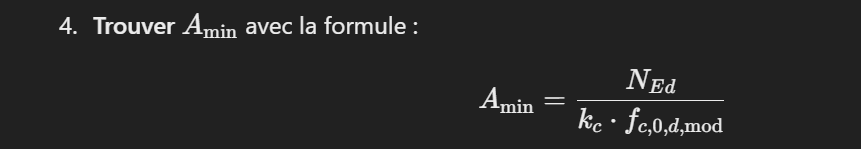

SOURCE :
 Dimensionement des structure en bois (aide a l'utilisation des normes SIA 260, 261 et 265)- Pierre André Dupraz - HEPIA 2023